# This is just an assignment

Name: Jarvis Yuan \
Dataset: [Electric Vehicle Charging Stations](https://www.kaggle.com/prasertk/electric-vehicle-charging-stations-in-usa/code)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from math import isnan

In [47]:
ev_df = pd.read_csv('../data/ev_stations_v1.csv')

In [48]:
ev_df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,NaN,Long Beach,CA,90803,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
ev_df.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

In [57]:
ev_df = ev_df[ev_df['EV Network'].notna()]
ev_df['EV Network']

0              Non-Networked
1              Non-Networked
2              Non-Networked
3              Non-Networked
4              Non-Networked
                ...         
50284    ChargePoint Network
50285           eVgo Network
50286              Greenlots
50287              Greenlots
50288      Electrify America
Name: EV Network, Length: 50284, dtype: object

In [58]:
ev_df['EV Network'].describe()

count                   50284
unique                     24
top       ChargePoint Network
freq                    27285
Name: EV Network, dtype: object

In [59]:
ev_df['EV Network'].unique()

array(['Non-Networked', 'Volta', 'EV Connect', 'ChargePoint Network',
       'OpConnect', 'SemaCharge Network', 'Tesla Destination',
       'Greenlots', 'EVGATEWAY', 'POWERFLEX', 'eVgo Network', 'Webasto',
       'CHARGELAB', 'AMPUP', 'EVCS', 'Blink Network', 'FCN', 'Tesla',
       'Electrify America', 'FLO', 'FPLEV', 'ZEFNET', 'LIVINGSTON',
       'Electrify Canada'], dtype=object)

In [62]:
freq_dict = {}

for i in ev_df['EV Network']:
    freq_dict[i] = freq_dict.get(i, 0) + 1

In [63]:
freq_dict

{'Non-Networked': 8480,
 'Volta': 929,
 'EV Connect': 896,
 'ChargePoint Network': 27285,
 'OpConnect': 150,
 'SemaCharge Network': 1932,
 'Tesla Destination': 4437,
 'Greenlots': 1036,
 'EVGATEWAY': 31,
 'POWERFLEX': 71,
 'eVgo Network': 883,
 'Webasto': 61,
 'CHARGELAB': 4,
 'AMPUP': 45,
 'EVCS': 46,
 'Blink Network': 1576,
 'FCN': 118,
 'Tesla': 1249,
 'Electrify America': 738,
 'FLO': 262,
 'FPLEV': 3,
 'ZEFNET': 4,
 'LIVINGSTON': 47,
 'Electrify Canada': 1}

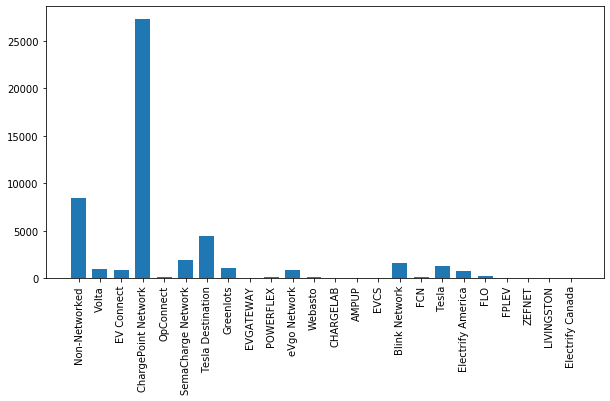

In [71]:
fig = plt.figure(figsize = (10, 5))
plt.bar(freq_dict.keys(), freq_dict.values(), width = 0.7)
plt.xticks(rotation='vertical');

wow, ChargePoint Network has the largest number of charging points in the US by a big margin, I was expecting Tesla..